# 03_Inference-ONNX
https://github.com/Kazuhito00/RO-GAN-using-Lightweight-GAN<br>
ハードウェア アクセラレータ：GPU

# Google Colaboratory：Google Driveマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive'

# ONNX推論テスト

In [ ]:
!pip install onnxruntime

In [4]:
import onnxruntime

In [5]:
onnx_session = onnxruntime.InferenceSession("ro_gan_ge.onnx")

input_name = onnx_session.get_inputs()[0].name
output_name = onnx_session.get_outputs()[0].name

In [6]:
import numpy as np
input_data = np.random.randn(1, 256).astype('float32')

In [7]:
from PIL import Image

result = onnx_session.run([output_name], {input_name: input_data})
result = np.squeeze(result)
result = np.clip(result, 0.0, 1.0)
result = result * 255

image_array = np.asarray(result)
image_array = image_array.transpose((1, 2, 0))
image = Image.fromarray(np.uint8(image_array), mode='RGB')

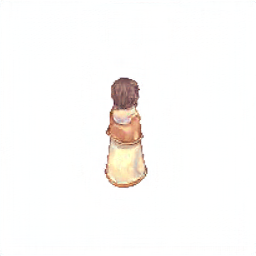

In [8]:
from IPython.display import display
display(image)